# 🎯 Project: The Automated Task Manager

Welcome to your hands-on AI application build! Today, you aren't just writing code; you are building a tool that solves a common corporate headache: turning messy meeting minutes into assigned tasks.

## The Workflow
We will follow the exact same path a Machine Learning Engineer takes:

- Exploration: Understanding the relationship between task descriptions and employees.

- Training: Experimenting with "Brains" (Classifiers) like SVMs and Neural Networks to see which one "learns" best.

- Deployment: Wrapping your best model into a professional-looking web application that runs directly in this notebook.

## The Problem
Our organization has a historical dataset of tasks assigned to specific employees. We want to automate the assignment of new tasks extracted from future meeting minutes.

## 📊 Section 1: Data Exploration
Before training our AI model, we first need to understand the data it will learn from. In our dataset, each row represents a real work task. It contains:

*   Task Description: The actual text (e.g., "Review the employment contracts").
*   Employee ID: The unique number for that role. This is the target label the model actually learns to predict.
* Role: The job title or department (e.g., "HR Specialist"). This is the human-readable label.
*   Task Embedding: The numerical representation of the task. (Think of this as the "computer-readable" version of the sentence).


🎯 Our goal is to train an AI system that can learn patterns from past tasks and make intelligent assignments in the future. But before training the model, we must check whether our data is fair, balanced, and meaningful.

⚖️ Data Balance Check

How many tasks does each employee have? Are they equally represented?

Your Task: Run the code cell below and calculate the number of tasks assigned to each employee.

💡 Why this matters?

If "Employee A" has 90% of the tasks, the AI may learn to assign most new tasks to "Employee A", simply because that was the most common pattern in the past.

This means the AI would rely on historical frequency rather than truly understanding the task description. Therefore, we aim for a dataset where every employee has a similar number of tasks.

Dataset Loaded Successfully!
Total Rows: 1000
--- Human vs. Machine Representation ---


,task_description,task_embedding,role,employee_id
563,Update the employment contracts to improve ret...,"[-0.0362984017, 0.0245057084, 0.0102658272, 0....",hr_specialist,2
589,Onboard the employee handbook to improve reten...,"[0.0198194049, 0.0395537913, -0.0138642211, 0....",hr_specialist,2
92,Deploy the API endpoints to improve scalability.,"[-0.014703447, -0.0312718973, -0.0380080082, -...",backend_dev,0
361,Clean the exploratory analysis for the recomme...,"[-0.0302134827, -0.0330013782, -0.0200778991, ...",data_scientist,1
566,Review the employment contracts to ensure comp...,"[-0.0728312731, 0.0426350497, -0.0334243961, -...",hr_specialist,2


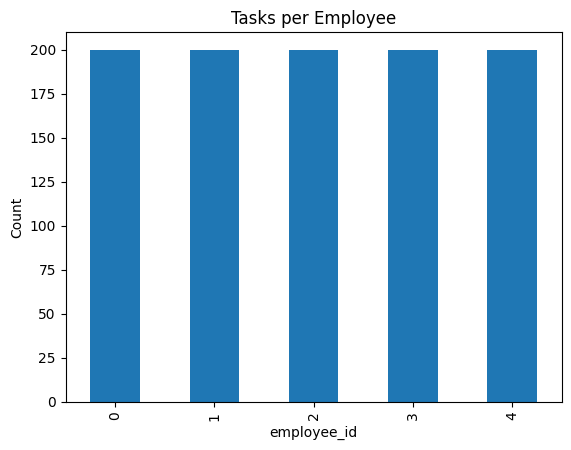

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load the CSV file
df = pd.read_csv('tasks_dataset_simple.csv')

# Convert embeddings from text into numerical values so the AI model can learn from them.
df['task_embedding'] = df['task_embedding'].apply(
    lambda x: np.fromstring(x.strip("[]"), sep=" ")
)

# 3. Preview the data
print(f"Dataset Loaded Successfully!")
print(f"Total Rows: {len(df)}")
# Displaying the 'Hybrid' view
print("--- Human vs. Machine Representation ---")
display(df.sample(5))

# Show distribution
df['employee_id'].value_counts().plot(kind='bar', title="Tasks per Employee")
plt.ylabel("Count")
plt.show()

🔎 Observation:
All employees have the same number of tasks.

So we have a balanced dataset! Our model cannot 'cheat' by guessing the most popular person. It is forced to actually learn the difference between each employee type without favoring one over another.

💡 Note: How can the AI understand task descriptions?

The answer is embeddings.

Embeddings convert each task description into numbers that capture its meaning, not just its appearance.

This allows the AI to recognize patterns and relationships between tasks based on their content.

Importantly, because embeddings capture meaning and context, the AI does not rely on simplistic rules, such as:

* assigning tasks based only on the length of the description
* matching specific keywords to specific employees

Instead, the AI learns to interpret the overall meaning of the task, which leads to more accurate and reliable predictions!

## 🧠 Section 2: Now we train our model!

We will now use the emb column as our input ($X$) and the emp_id as our target ($y$).
Neural Networks are powerful but can "overfit" (memorize) small datasets. SVMs are more robust for smaller samples. Maybe Random forests are better. Which one performs better on our test data?

## Section 2.1 - YOUR TASK - Try using SVMs?
TODO, using scikit-learn

## Section 2.2 - YOUR TASK - Try using Random Forests?
TODO, using scikit-learn

## Section 2.3 - YOUR TASK - Try using Neural Networks?
TODO, using **Pytorch**

## Section 2.4 - YOUR TASK - Compare and choose the best model
TODO, using **Pytorch**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, f1_score

# Prepare the numeric data
X = np.stack(df['emb'].values)
y = df['emp_id']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define Models
models = {
    "Support Vector Machine": SVC(kernel='linear', probability=True),
    "Neural Network (MLP)": MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=1000)
}

# Training and Evaluation
for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    f1 = f1_score(y_test, preds, average='weighted')
    print(f"✅ {name} | Weighted F1-Score: {f1:.2f}")
    print(classification_report(y_test, preds, zero_division=0))
    print("-" * 40)

# We choose the best model for the app
best_model = models["Neural Network (MLP)"]

✅ Support Vector Machine | Weighted F1-Score: 0.00
              precision    recall  f1-score   support

         101       0.00      0.00      0.00       2.0
         102       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

----------------------------------------
✅ Neural Network (MLP) | Weighted F1-Score: 0.00
              precision    recall  f1-score   support

         101       0.00      0.00      0.00       2.0
         102       0.00      0.00      0.00       0.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0

----------------------------------------


## 🚀 Section 3: The Integrated Manager App

This cell launches the interface. The "Magic" happens in the orchestrator function, which connects the External Service (Extraction) to Your Brain (Classification).

### Section 3.1 - YOUR TASK - Launch the inference in the app

In [ ]:
import IPython
from google.colab import output

def ProcessMinutes(transcript):
    # 1. SIMULATED EXTERNAL SERVICE: Extracts clean tasks from messy minutes
    # (In production, this is an API call to GPT-4 or Claude)
    extracted_tasks = ["Update the main SQL database", "Design the Q4 budget"]

    # 2. SIMULATED EMBEDDING: Turning the new tasks into math (vectors)
    # These vectors match the 'style' of our training data
    new_embeddings = np.array([[0.13, -0.48, 0.78, 0.18], [0.82, 0.18, -0.12, 0.88]])

    # 3. YOUR MODEL: Identifying the responsible employee
    predictions = best_model.predict(new_embeddings)

    response = []
    for task, emp in zip(extracted_tasks, predictions):
        response.append({"task": task, "owner": int(emp)})

    return IPython.display.JSON(response)

output.register_callback('notebook.ProcessMinutes', orchestrator)

# --- THE WEB INTERFACE ---
url = "https://raw.githubusercontent.com/eth-bmai-fs26/project/refs/heads/week1/task_meeting/week1/task_meeting/task_assigner_app.html"
response = requests.get(url)
response.raise_for_status() # Check for 404/500 errors
html_app = response.text
IPython.display.display(IPython.display.HTML(html_app))

ModuleNotFoundError: No module named 'google'